In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from rich.jupyter import print as rprint
import warnings
warnings.filterwarnings("ignore")

## <div align="center" style="color:#2dba4e"> Load data</div>

In [53]:
cols=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv("./Data/magic04.data",names=cols)
rprint("done",style="bold green")
df.head(5)


done

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [54]:

df1=df["class"]

In [55]:
df["class"].unique()

array(['g', 'h'], dtype=object)

convert g and h to 1 and o using this or using dummies or one-hot-encoding
```py
# dummies
pd.get_dummies(df["class"],dummy_na=True)
# one-hot-encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(max_categories=3, sparse_output=False).fit(df["class"])
```

In [56]:
df["class"] = (df["class"]=="g").astype(int)
df["class"].unique()

array([1, 0])

In [57]:
df.head(5)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


categorical data:
    - nominal data,ordinal data,
  
numerical data:
    - ratio data,quantitive

reference `https://www.youtube.com/watch?v=8N5IMF-T3pc`

from the above data we can determine that since <span style="color:blue">"class"</span> is given we can use <span style="color:green">supervised learning </span> 

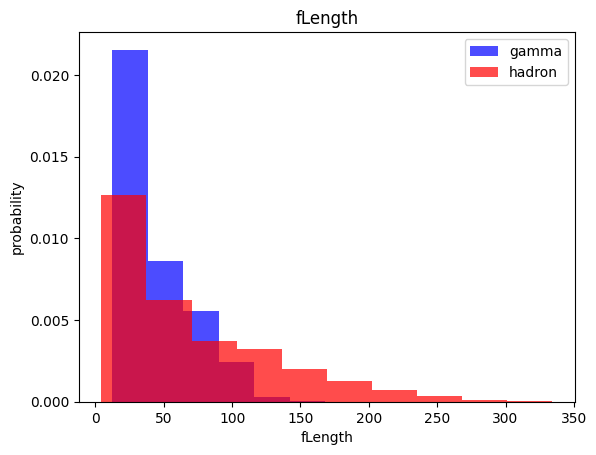

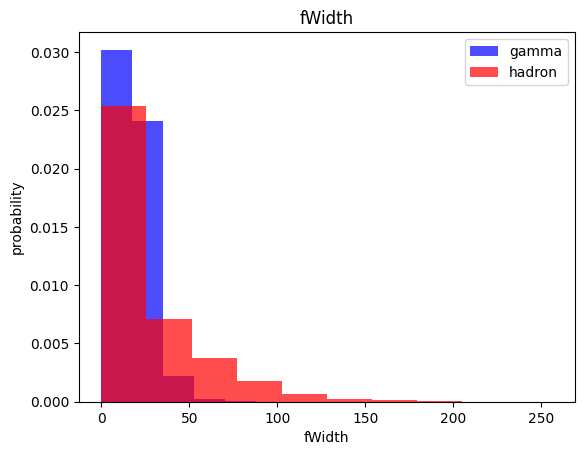

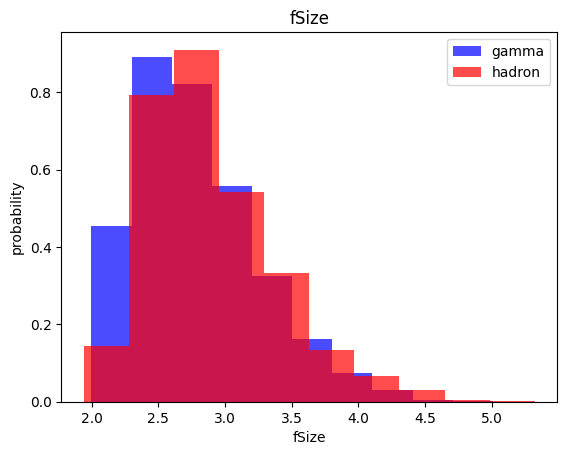

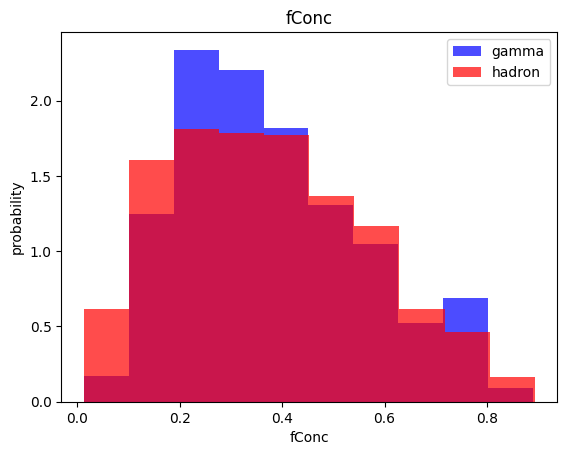

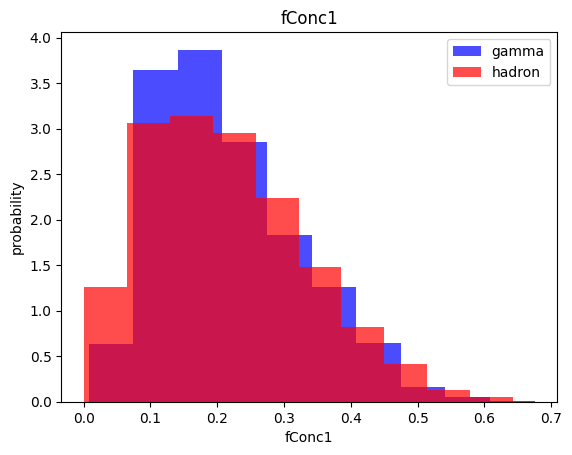

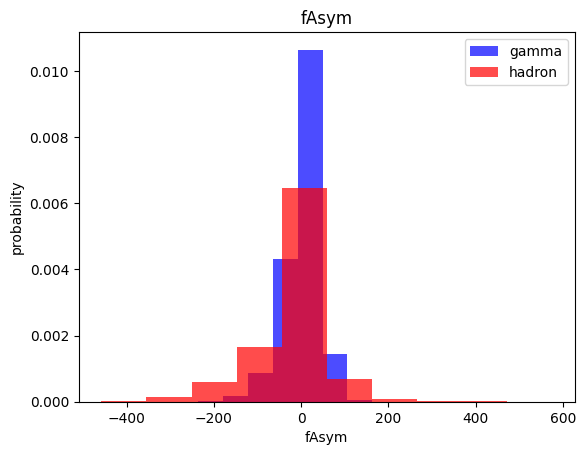

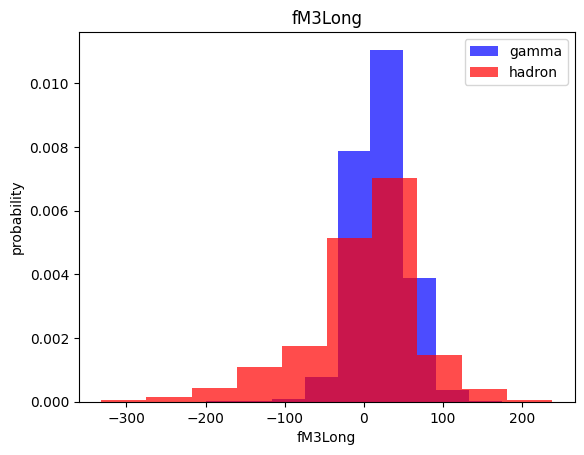

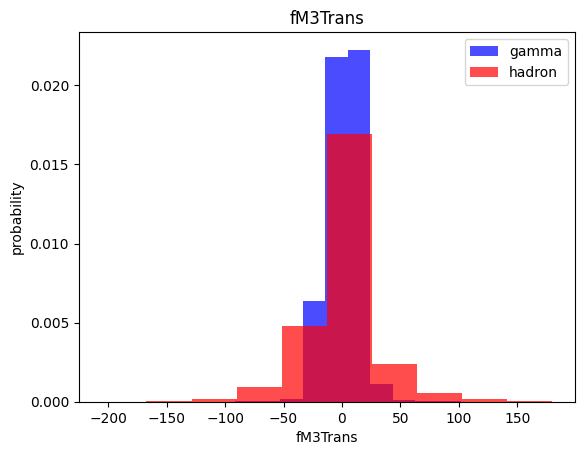

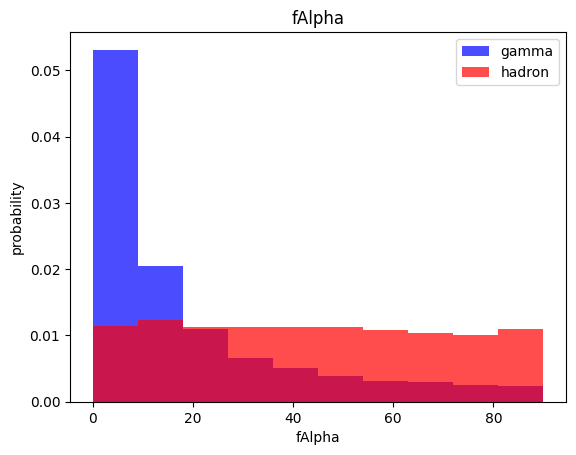

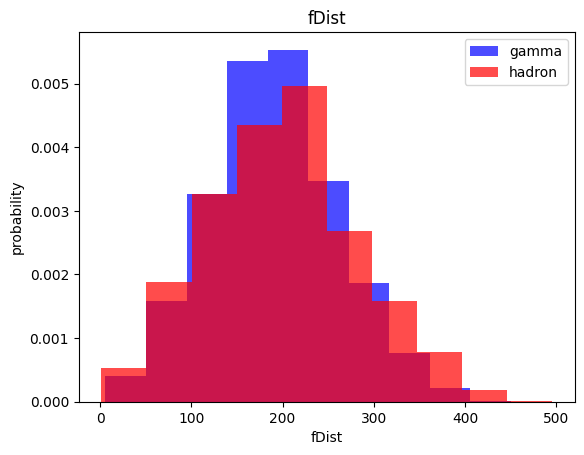

In [58]:
for data in cols[:-1]:
    plt.hist(df[df["class"]==1][data], color="blue",label="gamma", alpha=0.7,density=True)
    plt.hist(df[df["class"]==0][data], color="red",label="hadron", alpha=0.7,density=True)
    plt.title(data)
    plt.ylabel("probability")
    plt.xlabel(data)
    plt.legend()
    plt.show()

## <div align="center" style="color:orange"> split the data into Train,validate,test datasets</div>

In [59]:
train,valid,test=np.split(df.sample(frac=1), [int(0.6*len(df)),int(0.8*len(df))])

In [60]:
rprint(f'data: {len(df)} train: {len(train)} validate: {len(valid)} test:{len(test)}') #sum of train,validate,test = {len(train) + len(validate) + len(test)}

data: 19020 train: 11412 validate: 3804 test:3804

## <div align="center"> <span style="color:orange">normalization </span></div>

In [61]:
def normalize_data(dataframe,oversample=False):
    X= dataframe[dataframe.columns[:-1]].values
    y= dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros=RandomOverSampler()
        X,y=ros.fit_resample(X,y)

    data = np.hstack((X,np.reshape(y,(-1,1))))

    return data, X, y

Check proportionality of output data

In [62]:
rprint("gamma:", len(train[train["class"]==1])) # gamaa
rprint("hadron:", len(train[train["class"]==0])) # hadron


gamma: 7411

hadron: 4001

In [63]:
train, X_train,y_train = normalize_data(train,oversample=True)


In [64]:
rprint("y_train:", len(y_train)) #total
rprint("sum y_train: gamma", sum(y_train==1)) 
rprint("sum y_train hadron:", sum(y_train==0)) 

y_train: 14822

sum y_train: gamma 7411

sum y_train hadron: 7411

In [65]:
valid, X_valid,y_valid = normalize_data(valid,oversample=False)
test, X_test,y_test = normalize_data(test,oversample=False)

## types of Models 
- KNN  
- Naive Bayes
- Logistic Regression
- Support Vector Machines (SVM)  
#### Euclidean distance $$d=\sqrt{(x_{1} - x_{2})^2 + (y_{1} - y_{2})^2}$$  

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [71]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [72]:
y_predict=knn_model.predict(X_test)

In [73]:
rprint(classification_report(y_test,y_predict))

precision    recall  f1-score   support

           0       0.73      0.73      0.73      1349
           1       0.85      0.85      0.85      2455

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804

Accuracy = 81% 

Precission= (actual:73% for 0(gamma) and 85% for 1(hadron))

f1-score = 

In [76]:
rprint( "Accuracy = 81% Precission = (actual:73% for 0(gamma) and 85% for 1(hadron))")

Accuracy = 81% Precission = (actual:73% for 0(gamma) and 85% for 1(hadron))

## <div align="center"><span style="color:orange">Naive Bayes</span></div>


In [77]:
from sklearn.naive_bayes import GaussianNB

In [78]:
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [79]:
nb_model=nb_model.fit(X_train,y_train)

In [80]:
y_predict=nb_model.predict(X_test)
rprint(classification_report(y_test,y_predict))

precision    recall  f1-score   support

           0       0.66      0.40      0.50      1349
           1       0.73      0.89      0.80      2455

    accuracy                           0.71      3804
   macro avg       0.69      0.64      0.65      3804
weighted avg       0.70      0.71      0.69      3804

NO improvement in model

## ## <div align="center"><span style="color:orange">Log Regression</span></div>


In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
log_model=LogisticRegression()
log_model = log_model.fit(X_train,y_train)

In [83]:
y_predict=log_model.predict(X_test)
rprint(classification_report(y_test,y_predict))

precision    recall  f1-score   support

           0       0.69      0.72      0.71      1349
           1       0.84      0.82      0.83      2455

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804

## <div align="center"><span style="color:orange">Support Vector Machines (SVM)</span></div>


In [88]:
rprint("[bold red]Note[/bold red] : [red]SVM[/red]  are not good if [green]outliers[/green] are present in dataset ")

Note : SVM  are not good if outliers are present in dataset

In [90]:
from sklearn.svm import SVC #Support Vector Classifier

In [91]:
svm_model=SVC()
svm_model = svm_model.fit(X_train,y_train)

In [92]:
y_predict=svm_model.predict(X_test)
rprint(classification_report(y_test,y_predict))

precision    recall  f1-score   support

           0       0.82      0.80      0.81      1349
           1       0.89      0.90      0.90      2455

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.87      0.86      3804

#### The best model yet is SVM

lets try unsupervised learning Neural Network to beat the model

In [93]:
import tensorflow as tf

In [94]:
nn_model= tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation="relu",input_shape=(10,)), # activation options relu, sigmoid tanh
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid") # always use sigmoid for last/output layer for activation
])

In [97]:
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss="binary_crossentropy",metrics=["accuracy"])

In [95]:
def plot_loss(history):
    plt.plot(history.history["loss"],label="loss")
    plt.plot(history.history["val_loss"],label="val_loss")
    plt.xlabel("Epoch")
    plt.ylabel("Binary crossentropy")
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_accuracy(history):
    plt.plot(history.history["accuracy"],label="accuracy")
    plt.plot(history.history["val_accuracy"],label="val_accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()


In [98]:
history=nn_model.fit(
    X_train,y_train,epochs=100,batch_size=32,validation_split=0.2
);

Epoch 1/100


371/371 [==============================] - 13s 15ms/step - loss: 0.4605 - accuracy: 0.7836 - val_loss: 0.5832 - val_accuracy: 0.6658
Epoch 2/100
371/371 [==============================] - 2s 6ms/step - loss: 0.3786 - accuracy: 0.8377 - val_loss: 0.5567 - val_accuracy: 0.7120
Epoch 3/100
371/371 [==============================] - 2s 5ms/step - loss: 0.3584 - accuracy: 0.8504 - val_loss: 0.5438 - val_accuracy: 0.7150
Epoch 4/100
371/371 [==============================] - 2s 5ms/step - loss: 0.3482 - accuracy: 0.8548 - val_loss: 0.5110 - val_accuracy: 0.7332
Epoch 5/100
371/371 [==============================] - 2s 6ms/step - loss: 0.3406 - accuracy: 0.8576 - val_loss: 0.5224 - val_accuracy: 0.7376
Epoch 6/100
371/371 [==============================] - 2s 5ms/step - loss: 0.3365 - accuracy: 0.8581 - val_loss: 0.4830 - val_accuracy: 0.7403
Epoch 7/100
371/371 [==============================] - 2s 6ms/step - loss: 0.3316 - accuracy: 0.8621 - val_loss: 0.4604 - val_accuracy: 0.

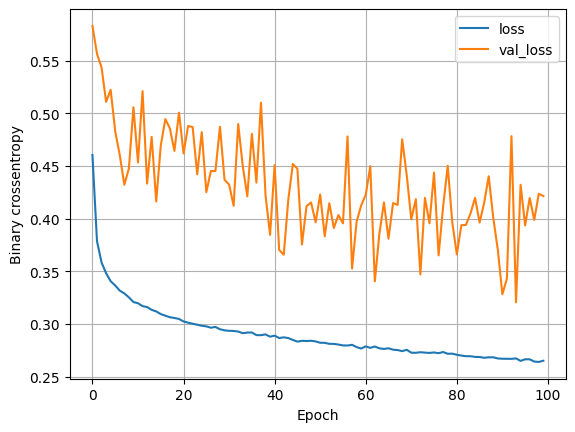

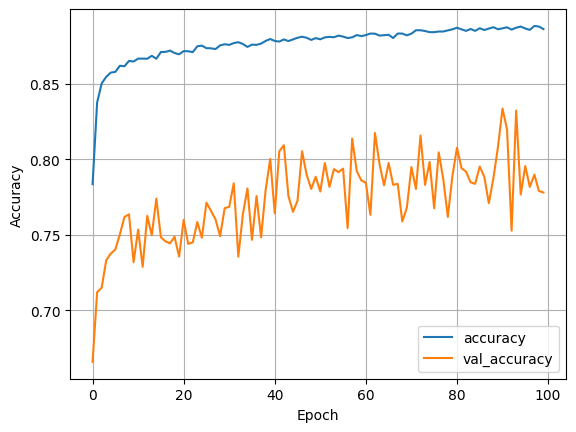

In [99]:
plot_loss(history)
plot_accuracy(history)

### slightly better then SVM

In [102]:
def train_NN_model(X_train,y_train,num_nodes,dropout_prob,batch_size,epochs,learning_rate=0.001):
    nn_model= tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes,activation="relu",input_shape=(10,)), # activation options relu, sigmoid tanh
    tf.keras.layers.Droupout(dropout_prob),
    tf.keras.layers.Dense(num_nodes,activation="relu"),
    tf.keras.layers.Droupout(dropout_prob),
    tf.keras.layers.Dense(1,activation="sigmoid") # always use sigmoid for last/output layer for activation
    ]) 

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss="binary_crossentropy",metrics=["accuracy"])  

    history=nn_model.fit(
    X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=0
    )
    return nn_model,history

## L1 Loss & L2 Loss
L1: $loss = sum(|y_{real} - y_{predicted}|)$

L2: $loss = sum((y_{real} - y_{predicted})^{2})$

Binary cross Entropy loss

$$loss = \frac{-1}{N}*sum(y_{real}*log(y_{predicted} + (1-y_{real})*log((1-y_{predicted}))))$$